## Комментарий наставника
Привет, Иван! Меня зовут Александр и я буду проверять твой проект. Спасибо за твою работу:) Далее по ходу работы я оставлю свои комментарии и предложения. Постарайся их учесть в этом и дальнейших проектах. Комментарии ты можешь найти в текстовой ячейке с заголовком «Комментарий наставника» (как здесь) либо в ячейках с кодом в следующем виде: «#Комментарий наставника: <сам комментарий>». \
Часть комментариев может быть выделена цветом: \
<span style="color:green">Зелёный цвет символизирует, что всё отлично.</span> \
<span style="color:orange">Оранжевый цвет символизирует рекомендации.</span> \
<span style="color:red">Красный цвет символизирует недочёты.</span> \
<span style="color:blue">Синим цветом отмечен итоговый комментарий.</span>

<span style="color:magenta">Внесенные изменения:</span>

Секция 4 
 
    Тестирование модели проведено на наборах сделанных в секции 2
    
    Значение параметра min_samples_leaf исправлено на значение по умолчанию (оптимальное)
    
Секция 5
    
    проверка на адекватность выполнена на датасетах из секции 2
    
Спасибо за ценные рекомендации


# Рекомендация тарифов

В вашем распоряжении данные о поведении клиентов, которые уже перешли на эти тарифы (из проекта курса «Статистический анализ данных»). Нужно построить модель для задачи классификации, которая выберет подходящий тариф. Предобработка данных не понадобится — вы её уже сделали.

Постройте модель с максимально большим значением *accuracy*. Чтобы сдать проект успешно, нужно довести долю правильных ответов по крайней мере до 0.75. Проверьте *accuracy* на тестовой выборке самостоятельно.

### План работ

* 1 Знакомство с данными
* - выделение зависимых и целевого признаков
* 2 Подготовка к исследованию моделей
* - деление данных на обучающую, проверочную и тестовые выборки
* 3 Изучение моделей
* - сравнение классификаторов, определение лучшего
* - тонкая настройка параметров
* 4 Тестирование итоговой модели
* 5 Проверка модели на адекватность
* 6 Выводы


## Комментарий наставника
<span style="color:green">Отличный план работы, приступим.</span>

## 1. Знакомство с данными

Импортируем необходимые библиотеки и модули:

In [1]:
import pandas as pd
import numpy as np
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.linear_model import LogisticRegression
from sklearn import metrics, model_selection
from sklearn.dummy import DummyClassifier
%matplotlib inline
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
df = pd.read_csv('./data/users_behavior.csv')
#df = pd.read_csv('/datasets/users_behavior.csv')

получим общую информацию:

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3214 entries, 0 to 3213
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   calls     3214 non-null   float64
 1   minutes   3214 non-null   float64
 2   messages  3214 non-null   float64
 3   mb_used   3214 non-null   float64
 4   is_ultra  3214 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 125.7 KB


In [4]:
df.sample(5)

,calls,minutes,messages,mb_used,is_ultra
1624,61.0,490.78,36.0,20422.53,0
2734,42.0,365.00,34.0,11265.49,0
533,78.0,475.55,17.0,20927.16,0
1276,18.0,113.18,19.0,11333.47,0
1231,13.0,82.55,4.0,2890.46,1


Выделим признаки для классификации и изучим взаимосвязи:

In [5]:
features=df.drop('is_ultra', axis=1)

In [6]:
features.corr().round(2)

,calls,minutes,messages,mb_used
calls,1.00,0.98,0.18,0.29
minutes,0.98,1.00,0.17,0.28
messages,0.18,0.17,1.00,0.20
mb_used,0.29,0.28,0.20,1.00


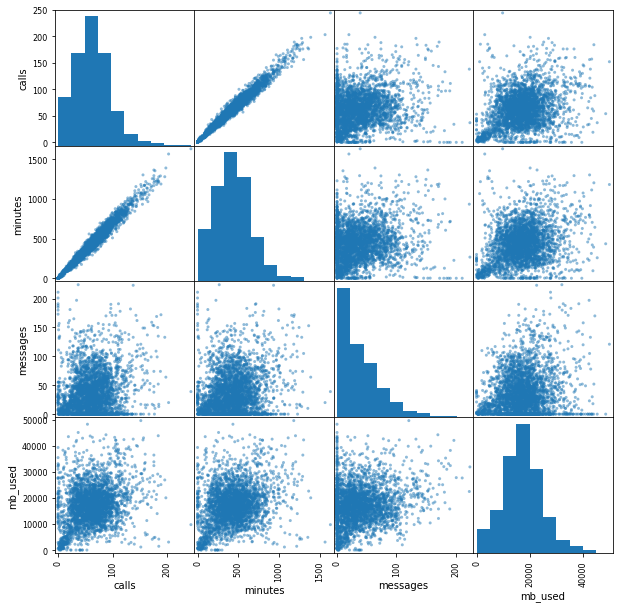

In [7]:
pd.plotting.scatter_matrix(features, figsize=(10, 10));

Сильно взаимосвязаны "число звонков" и "время разговора", что видно по значению коэффициэнта корреляции и из диаграмм рассеяния. Один из этих признаков явно лишний и будет в дальнейшем влиять на качество модели.

## Комментарий наставника
<span style="color:green">Здорово, что ты это обнаружил!</span>

Выделим целевую колонку, содержащую результаты классификации:

In [8]:
target=df['is_ultra']

И посмотрим как распределены значения по классам в процентном отношении и визуально:

In [9]:
classes = target.values
counter = Counter(classes)
for k,v in counter.items():
    per = v / len(classes) * 100
    print('Класс=%d, Число значений=%d, Процент=%.2f%%' % (k, v, per))

Класс=0, Число значений=2229, Процент=69.35%
Класс=1, Число значений=985, Процент=30.65%


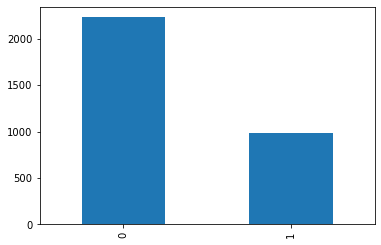

In [10]:
target.value_counts().plot.bar();

## Комментарий наставника
<span style="color:green">Очень хорошо.</span>

### Выводы

Изучены предобработанные данные оператора телекома по которым надо построить модель предсказывающую выбор тарифа.  
- Всего 3214 значений для 5 перменных включая результат классификации. 
- Результаты классификации несбалансированы, соотношение классов практически 1 к 3.
- Некотроые переменные-"число звонков" и "время разговоров" сильно связаны между собой. Это несомненно повлияет на качество предсказательной модели. 
- Поэтому имеет смысл обучить модели с учетом и без учета одного признака, убрав один из сильно связанных признаков и сравнить результат.

## Комментарий наставника
<span style="color:green">Прекрасный анализ исходного датасета, никаких вопросов нет. Идём далее.</span>

## 2. Разбиение  данных на выборки

для разбиения данных на выборки используем стандартную функцию train_test_split из библиотеки scikit_learn
Разбиение в соотношении 3 1 1 для обучающей, валидационной и тестовой выборок

In [11]:
x_train, x_temp, y_train, y_temp= train_test_split(features, target, test_size = 0.4, random_state=12345)

In [12]:
x_valid, x_test, y_valid, y_test= train_test_split(x_temp, y_temp, test_size = 0.5, random_state=12345)

In [13]:
x_train.shape

(1928, 4)

In [14]:
x_test.shape

(643, 4)

## Комментарий наставника
<span style="color:green">Хорошо.</span>

## 3. Исследование моделей


#### Применение различных моделей классификации

Оценим применимость различных классификаторов, с параметрами заданными по умолчания, к нашей задаче. Для выбора классификатора будем использовать в качестве критерия  значение accuracy_score.

логистическая регрессия

In [15]:
logistic_mod=LogisticRegression(random_state=12345)

обучаем

In [16]:
logistic_mod.fit(x_train, y_train) 

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=12345, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

предсказываем

In [17]:
log_pred = logistic_mod.predict(x_valid)

оцениваем точность предсказания

In [18]:
accuracy_score( y_valid,log_pred)


0.7589424572317263

## Комментарий наставника
<span style="color:green">Всё верно.</span>

Дерево решений

определяем модель

In [19]:
model_tree = DecisionTreeClassifier(random_state=12345)

обучаем

In [20]:
model_tree.fit(x_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=12345, splitter='best')

Предсказываем и оцениваем

In [21]:
predict_tree = model_tree.predict(x_valid)
accuracy_score(y_valid, predict_tree)

0.713841368584759

Классификационный случайный лес

In [22]:
rf_mod=RandomForestClassifier(random_state=12345)

In [23]:
rf_mod.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=12345,
                       verbose=0, warm_start=False)

Предсказываем и оцениваем:

In [24]:
rf_pred=rf_mod.predict(x_valid)
accuracy_score( y_valid, rf_pred)

0.7853810264385692

Наилучшие результаты показала модель на основе классификатора случайного леса.

Настройку гиперпараметров и изучение влияния переменных на результат классификации мы изучим именно с ее использованием.

## Комментарий наставника
<span style="color:orange">Один момент: лучше не отбрасывать сразу модели по результатам их эффективности на гиперпараметрах по умолчанию. Стоит попытаться под каждую модель подобрать лучшие гиперпараметры и только после этого уже сделать выбор в пользу той или иной модели.</span>

Определение важности переменных для классификации.

Найдем параметр важность(importances). В сумме для всех независимых переменных он равен 1

In [25]:
importances=rf_mod.feature_importances_
importances

array([0.21064964, 0.25084184, 0.21488023, 0.32362828])

И представим результаты графически

Отсортируем важности по убыванию и перераспределим имена признаков, чтобы они совпадали с отсортированными важностями:

In [26]:
indices=np.argsort(importances[::-1])
names=[x_train.columns[i] for i in indices]

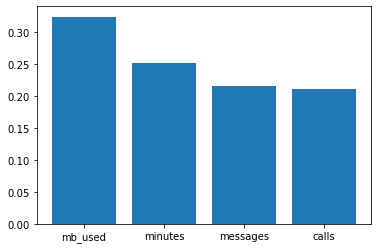

In [27]:
plt.figure()
plt.bar(range(x_train.shape[1]),importances[indices])
plt.xticks(range(x_train.shape[1]),names)
plt.show();

## Комментарий наставника
<span style="color:green">Отдельный + за анализ важности признаков, очень здорово!</span>

Видно, что в нашей взаимосвязанной паре переменных(длительность разговора/число звонков),значимость длительности разговора больше влияет на результат классификации чем число звонков.

Попробуем обучить модель отбросив менее значимую переменную в тренировочном и валидационных наборах:

In [28]:
x_train_1=x_train.drop('calls',axis=1)
x_valid_1=x_valid.drop('calls',axis=1)

Определяем модель:

In [29]:
rf_model=RandomForestClassifier(random_state=12345)

Обучим:

In [30]:
rf_model.fit(x_train_1,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=12345,
                       verbose=0, warm_start=False)

предсказываем и определяем правильность:

In [31]:
rf_pred_1=rf_model.predict(x_valid_1)

In [32]:
accuracy_rf_1 = accuracy_score( y_valid,rf_pred_1)
accuracy_rf_1

0.7589424572317263

Мы получили  значение показателя accuracy хуже, чем для той же модели классификации с полным набором признаков и сравнимо с показателем для логистической модели.
Изучение влияния гиперпараметров поэтому будем проводить с моделью, обученной на всех признаках.

## Комментарий наставника
<span style="color:green">Хорошо, но попробовать стоило:)</span>

Изучим влияния изменения гиперпараметров на качество нашей модели.

Начнем с параметра n_estimators, определяющего количество решающих деревьев:

In [33]:
for forest in range(10,101,10):
    model = RandomForestClassifier(random_state=12345, n_estimators = forest)
    model.fit(x_train, y_train)
    predictions_valid = model.predict(x_valid)
    print('n_estimators =', forest, ':', end='')
    print(accuracy_score( y_valid, predictions_valid))

n_estimators = 10 :0.7853810264385692
n_estimators = 20 :0.7869362363919129
n_estimators = 30 :0.7838258164852255
n_estimators = 40 :0.7838258164852255
n_estimators = 50 :0.7916018662519441
n_estimators = 60 :0.7853810264385692
n_estimators = 70 :0.7791601866251944
n_estimators = 80 :0.7822706065318819
n_estimators = 90 :0.7838258164852255
n_estimators = 100 :0.7853810264385692


наилучший результат получен при 50 решающих деревьев

Посмотрим как влияет максимальная глубина дерева решений(max_depth):

In [34]:
for depth in range(1,11):
    model = RandomForestClassifier(random_state=12345, max_depth = depth)
    model.fit(x_train, y_train)
    predictions_valid = model.predict(x_valid)
    print('max_depth =', depth, ':', end='')
    print(accuracy_score( y_valid, predictions_valid))

max_depth = 1 :0.7558320373250389
max_depth = 2 :0.7776049766718507
max_depth = 3 :0.7853810264385692
max_depth = 4 :0.7900466562986003
max_depth = 5 :0.7931570762052877
max_depth = 6 :0.8009331259720062
max_depth = 7 :0.7947122861586314
max_depth = 8 :0.7962674961119751
max_depth = 9 :0.7853810264385692
max_depth = 10 :0.7916018662519441


Оптимальное значение глубины дерева - 6 при значении количества деревьев по умолчанию.

Посмотрим изменится ли значение оптимаоьной глубины дерева при оптимальном количестве деревьев -50

In [35]:
for tree in range(1,11):
    model = RandomForestClassifier(random_state=12345,n_estimators=50, max_depth = tree)
    model.fit(x_train, y_train)
    predictions_valid = model.predict(x_valid)
    print('max_depth =', tree, ':', end='')
    print(accuracy_score( y_valid,predictions_valid))

max_depth = 1 :0.7589424572317263
max_depth = 2 :0.7838258164852255
max_depth = 3 :0.7869362363919129
max_depth = 4 :0.7869362363919129
max_depth = 5 :0.7931570762052877
max_depth = 6 :0.7993779160186625
max_depth = 7 :0.80248833592535
max_depth = 8 :0.807153965785381
max_depth = 9 :0.7978227060653188
max_depth = 10 :0.7931570762052877


Оптимальное значение глубины дерева - 8

Посмотрим как влияет минимальное количество наблюдений, которое должно находится в одном листе( min_samples_leaf) при ранее найденных значениях для количества деревьев и оптимальной глубины -50 и 8

In [36]:
for leaf in range(1,11):
    model = RandomForestClassifier(random_state=12345,n_estimators=50, max_depth = 8,min_samples_leaf=leaf)
    model.fit(x_train, y_train)
    predictions_valid = model.predict(x_valid)
    print('min_samples_leaf =', leaf, ':', end='')
    print(accuracy_score( y_valid,predictions_valid))

min_samples_leaf = 1 :0.807153965785381
min_samples_leaf = 2 :0.80248833592535
min_samples_leaf = 3 :0.7978227060653188
min_samples_leaf = 4 :0.8009331259720062
min_samples_leaf = 5 :0.7947122861586314
min_samples_leaf = 6 :0.8009331259720062
min_samples_leaf = 7 :0.8040435458786936
min_samples_leaf = 8 :0.8055987558320373
min_samples_leaf = 9 :0.8009331259720062
min_samples_leaf = 10 :0.8009331259720062


Увеличение минимального количества наблюдений не приводит к улучшению нашей модели. Оставим значение параметра по умолчанию (1)

## Комментарий наставника
<span style="color:green">Очень хорошая работа с подбором параметров к случайному лесу.</span> \
<span style="color:orange">В идеале можно было бы создать три цикла (пусть два из них будут вложенными) и одновременно подобрать лучшую комбинацию числа деревьев, глубины и минимального числа объектов на лист:</span>

In [37]:
for estim in range(10, 101, 10):
    for depth in range(1, 10):
        for leaf in range(1, 10):
            pass

### Вывод

- Изучена применимость трех различных классификаторов для решения задачи по выбору тарифов
- Наилучший результат показан моделью построенной на классификаторе случайного леса
- Дальнейшая тонкая настройка гиперпараметров выбранной модели позволяет улучшить качество предсказаний

## Комментарий наставника
<span style="color:green">Всё так, переходим к тесту.</span>

## 4. Проверка модели на тестовой выборке

Проверим качество нашей модели с оптимизированными гиперпараметрами на ранее определенной тестовой выборке. 

## Комментарий наставника
<span style="color:red">А вот здесь важный момент: ты заново делишь датасет и таким образом записи из тренировочной выборки могли попасть в тестовую выборку, чего допустить нельзя, т.к. тогда получить справедливую оценку модели становится невозможно. Ранее ты уже разбивал датасет на выборки в начале проекта, используй их. Советую всегда разбивать датасет на выборки только один раз за проект и пользоваться ими, чтобы не возникло ошибок.</span>

In [40]:
bestmodel = RandomForestClassifier(random_state=12345,n_estimators=50, max_depth = 8)
bestmodel.fit(x_train, y_train)
predictions = bestmodel.predict(x_test)
    
accuracy_score( y_test,predictions)

0.7993779160186625

## Комментарий наставника
<span style="color:orange">Ты используешь значение **leaf** не то, которое решил использовать ранее, а последнее из цикла по его подбору:</span>

### Вывод
Обученная на большем наборе данных наша модель практически не потеряла в качестве предсказания. Показатель accuracy превосходит пороговое значение 0.75

## 5. Проверка модели на адекватность

Доля правильных ответов при случайном выборе тарифа будет составлять 0.69. Именно так, в соотношении 1 к 2,5 распределены наши классы в исходной выборке.

Подтвердим наше предположение с помощью классификатора DummyClassifier, выполняющего отнесение к классам на основе простых правил. Значение параметра strategy='most_frequent'' означает, что отнесение наблюдения к тому или иному классу производится с учетом частоты встречающихся значений классов.

Построим и обучим на его основе нашу базовую модель:

In [42]:
baseline_clf = DummyClassifier(strategy='most_frequent')
baseline_clf.fit(x_train, y_train)
baseline_predict=baseline_clf.predict(x_test)

accuracy_score(y_test,baseline_predict)


0.6842923794712286

Наша модель  прошла проверку на адекватность. Ее "правильность" оказалась выше чем у базовой модели, где классификация проводилась  с учетом соотношения классов в обучающей выборке.

### Вывод

Показано, что качество предсказаний нашей модели классификации выше чем у базовой.

## Комментарий наставника
<span style="color:green">Да, с проверкой модели на адекватность всё прекрасно. Здесь нечего даже добавить.</span>

## Чек-лист готовности проекта

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x] Jupyter Notebook открыт
- [х] Весь код исполняется без ошибок
- [х] Ячейки с кодом расположены в порядке исполнения
- [х] Выполнено задание 1: данные загружены и изучены
- [х] Выполнено задание 2: данные разбиты на три выборки
- [х] Выполнено задание 3: проведено исследование моделей
    - [х] Рассмотрено больше одной модели
    - [х] Рассмотрено хотя бы 3 значения гипепараметров для какой-нибудь модели
    - [х] Написаны выводы по результатам исследования
- [х] Выполнено задание 3: Проведено тестирование
- [х] Удалось достичь accuracy не меньше 0.75


## Общий вывод

По данным сотового оператора построена модель классификации для выбора подходящего тарифа.

Данные изучены, признаки разделены на зависимые и целевой, созданы наборы для обучения, проверки и тестирования.

Для решения поставленной задачи изучена применимость трехх различных классификаторов - логистической регрессии, решающего дерева и случайного леса.

Лучшей моделью по результатам обучения оказался классификатор на основе случайного леса

Дополнительная настройка гиперпараметров позволила улучшить качество предсказаний.

Итоговая модель показала хороший результат после обучения на расширенной выборке.

Сравнение построенной модели с базовой(выбор случаен и зависим от исходного соотношения классов) показало ее адекватность.

Для итоговой модели классификации удалось достичь accuracy не меньше 0.75

По итогам работы заполнен чек-лист проекта.

## Итоговый комментарий наставника
<span style="color:blue">Проект хороший, тебе осталось только поправить последнюю часть работы с тестированием модели и всё будет готово. Все комментарии и рекомендации я оставил. Будем ждать твою работу:)</span>